In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [67]:
def getPixel(img, center, x, y):
    value = 0
    try:
        if img[x][y] >= center:
            value = 1
    except:
        pass
    return value

In [68]:
def calculLBP(img, x, y):
    center = img[x][y]
    valueArray = []
    valueArray.append(getPixel(img, center, x-1, y+1))     # top_right
    valueArray.append(getPixel(img, center, x, y+1))       # right
    valueArray.append(getPixel(img, center, x+1, y+1))     # bottom_right
    valueArray.append(getPixel(img, center, x+1, y))       # bottom
    valueArray.append(getPixel(img, center, x+1, y-1))     # bottom_left
    valueArray.append(getPixel(img, center, x, y-1))       # left
    valueArray.append(getPixel(img, center, x-1, y-1))     # top_left
    valueArray.append(getPixel(img, center, x-1, y))       # top
    
    factorArray = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(valueArray)):
        val += valueArray[i] * factorArray[i]
    return val 

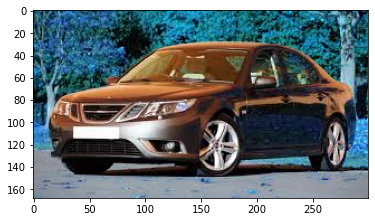

In [69]:
img = cv2.imread('car.jpg')
height, width, channel = img.shape
plt.imshow(img)

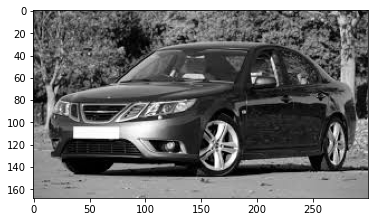

In [70]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [71]:
lbp = np.zeros((height, width, 3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        lbp[i, j] = calculLBP(gray, i, j)

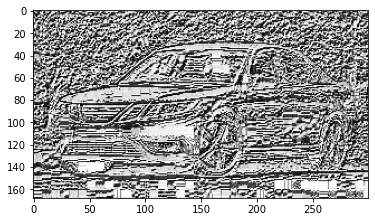

In [72]:
result = Image.fromarray(lbp, 'RGB')
result.save('lbp.png')
plt.imshow(result, cmap='gray')

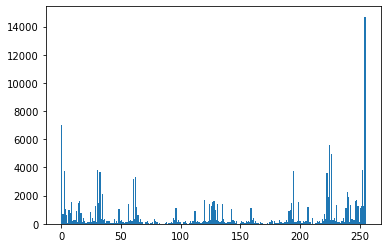

In [73]:
result_flaten = lbp.flatten() 
plt.hist(result_flaten, bins=256)
plt.show()

In [74]:
import random

randX = random.randint(0, 104)
randY = random.randint(0, 236)
print(randX)
print(randY)

55
53


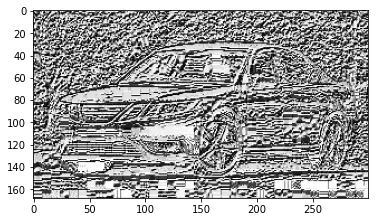

In [75]:
lbp = cv2.imread("lbp.png")
lbp = cv2.cvtColor(lbp, cv2.COLOR_BGR2GRAY)
plt.imshow(lbp, cmap='gray')

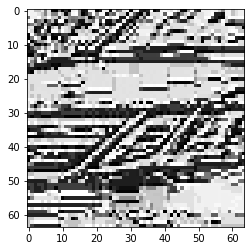

In [76]:
crop_img = lbp[randY:randY+64, randX:randX+64]
plt.imshow(crop_img, cmap='gray')

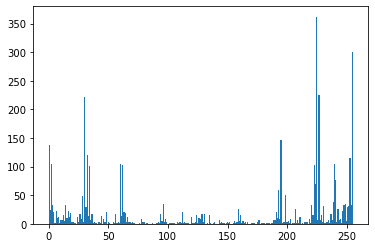

In [77]:
crop_img_flaten = crop_img.flatten() 
plt.hist(crop_img_flaten, bins=256)
plt.show()

In [80]:
found = 0
i = 0
j = 0
histo_img = cv2.calcHist(crop_img, [0],None,[256],[0,256])
for
while(i <= 104 && j <= 236){
    elem = lbp[j:j+64, i:i+64]
    histo_elem = cv2.calcHist(elem, [0],None,[256],[0,256])
    compa = 
    i = 1 + 1
    j = 
}

In [ ]:
# def gestion_souris(event,x,y,flags,param):
#     global mouseX,mouseY
#     global histo2
#     if event == cv2.EVENT_RBUTTONDBLCLK:
#         print(x,y)
#         fen02 = img_gray[y:y+32, x:x+32]      # ]/ y ensuite x
#         histo2= plt.hist(fen02.ravel(),256,[0,256]); 
#         plt.show()
#         print (diff)


#         mouseX,mouseY = x,y

# cv2.setMouseCallback('Fenetre',gestion_souris)